# Applied Machine Intelligence - Summative 2

In [94]:
# Import packages
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.datasets import load_digits
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, f1_score, precision_recall_curve, classification_report, confusion_matrix, accuracy_score,ConfusionMatrixDisplay
from sklearn.neural_network import MLPClassifier
from IPython import display
import math
import plotly.express as px
import nbformat
from IPython.display import display, Latex

## Task 1 - PCA

This analysis will perform principal componant analysis on the Breast Cancer dataset from the sklearn library. We start by importing the dataset.

In [95]:
# Load dataset
cancer = load_breast_cancer(as_frame=True)

The dataset is stored as a dictionary format. We can select the data for analysis using the key 'data'. The binary target variable that indicates a malignent tumour is stored as the values under the key 'target', although this won't be required for the PCA.

In [96]:
# Create a pandas dataframe containing the data
df = pd.DataFrame(np.c_[cancer['data'], cancer['target']],
                  columns= np.append(cancer['feature_names'], ['target']))
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0.0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0.0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0.0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0.0


In [97]:
# Drop the target for PCA analysis
features = df.drop(['target'], axis = 1)
features

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In order for the PCA to work effectively we must standardise the features. At its most simple, standardising puts the variables into the same unit of measurement by dividing each data point by the standard deviation of the feature (Sanguansat, 2012). This ensures that the PCA is not over-influenced by variables with larger values and variances.

Here we use the StandardScaler function from sklearn, which applies the following equation to centre and standardise the data:

\begin{equation*}
    z = \frac{x - u}{z}
\end{equation*}

where x is the sample datapoint, u is the mean of the variable within the sample and s is the standard deviation of the variable within the sample (Pedregosa et al., 2011).

In [98]:
# Standardise the features to put them over a common unit
standard = StandardScaler()
standard.fit(features)
features_standard = standard.transform(features)
features_standard_df = pd.DataFrame(features_standard, columns = features.columns) 
features_standard_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027,...,1.901185,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091
565,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611,...,1.536720,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978
566,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587,...,0.561361,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409
567,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695,...,1.961239,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635


Variable distributions before standardisation:


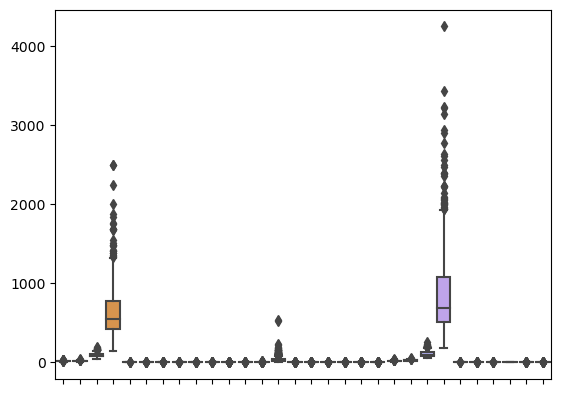

In [99]:
print('Variable distributions before standardisation:')
# Plot box plot of all variables
ax = sns.boxplot(features)
ax.set(xticklabels=[])
plt.show()

Variable distributions after standardisation:


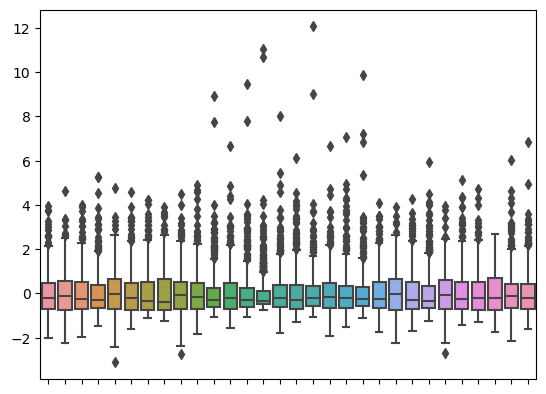

In [100]:
print('Variable distributions after standardisation:')
# Plot box plot of all variables
ax = sns.boxplot(features_standard_df)
ax.set(xticklabels=[])
plt.show()

The result is an array of the same dimension as the dataset, with all values on the same unit. We can see this in the before and after standardisation box plots above. 

In the before plot, we see there are a few variables that appear to have significantly different scale to the other variables. Following standardisation, all variables have a mean close to zero and standard deviation close to 1.

The PCA analysis is then applied to the standardised features. PCA creates orthonormal linear combinations of the features that capture the maximum amount of information (Shlens, 2003).

It does this through applying an eigendecomposition on the correlation or covariance matrix of the features. The output can be represented in matrix form:

\begin{equation*}
    \mathbf{A} = \mathbf{X} \Lambda \mathbf{X}^{-1}
\end{equation*}

In [101]:
## Fit PCA
pca = PCA(n_components= 0.95) 
pca.fit(features_standard)

# Transform the data using the fitted model
pca_output = pca.transform(features_standard)

# Visualise the shape of the output
pca_output.shape

(569, 10)

We now save the PCA output as a csv file

In [102]:
# Save PCA output
pd.DataFrame(pca_output).to_csv('pca_output.csv')

One benefit of principal componant analysis is that the information contained in the high dimensional data can be efficiently visualised by plot the first, second and third PCs.

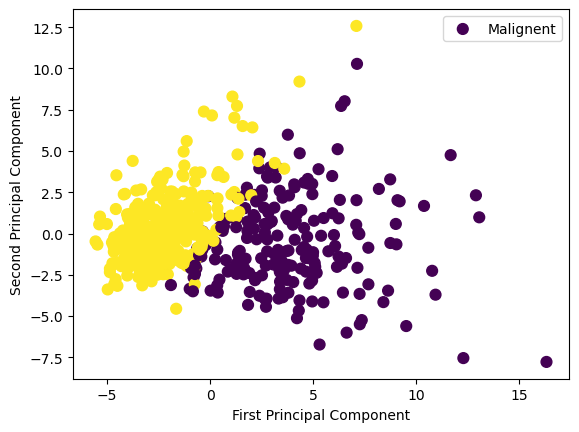

In [103]:
# Plot the first 2 principal components
plt.scatter(pca_output[:,0], pca_output[:,1], c=df['target'], s=60)
plt.legend(['Malignent'])
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()

In [104]:
# Format target variable as a factor
df['target'] = df['target'].astype(object)

# Plot a 3d chart with PCAs on each axis
fig = plt.figure(figsize=(15, 8))
fig = px.scatter_3d(x=pca_output[:,0], y=pca_output[:,1], z=pca_output[:,2],
              color=df['target'], opacity=0.7)

# Format chart
fig.update_layout(scene = dict(
                    xaxis_title=r'PCA 1',
                    yaxis_title=r'PCA 2',
                    zaxis_title=r'PCA 3'),
                    legend_title_text='Malignent',
                    width=700,
                    margin=dict(r=0, b=0, l=0, t=0))
fig.show()

<Figure size 1500x800 with 0 Axes>

Here we can see that the PCAs are able to seperate the malignent tumors from the begnign quite clearly. It would be fairly simple for an algorthim to identify a combination of PCAs that classifies the data to a high degree of accuracy (at least in-sample).

We can also use a scree plot to see how much variance (information) is captured by each PC.

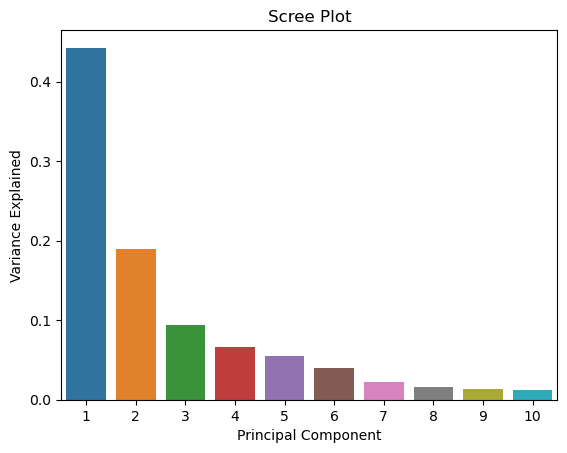

In [105]:
PC_values = np.arange(pca.n_components_) + 1
sns.barplot(x = PC_values, y = pca.explained_variance_ratio_)
#plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

In [106]:
# Print the individual and cumulatively amount of variance explained by each PC
var_counter = 0
for i in range(len(pca.explained_variance_ratio_)):
    var_counter += pca.explained_variance_ratio_[i]*100
    print(f'Principal component {i+1} explains {np.round(pca.explained_variance_ratio_[i]*100, 2)}% of the variance in the data. Cumulatively, {round(var_counter,2)}% of the variance has been captured.')

Principal component 1 explains 44.27% of the variance in the data. Cumulatively, 44.27% of the variance has been captured.
Principal component 2 explains 18.97% of the variance in the data. Cumulatively, 63.24% of the variance has been captured.
Principal component 3 explains 9.39% of the variance in the data. Cumulatively, 72.64% of the variance has been captured.
Principal component 4 explains 6.6% of the variance in the data. Cumulatively, 79.24% of the variance has been captured.
Principal component 5 explains 5.5% of the variance in the data. Cumulatively, 84.73% of the variance has been captured.
Principal component 6 explains 4.02% of the variance in the data. Cumulatively, 88.76% of the variance has been captured.
Principal component 7 explains 2.25% of the variance in the data. Cumulatively, 91.01% of the variance has been captured.
Principal component 8 explains 1.59% of the variance in the data. Cumulatively, 92.6% of the variance has been captured.
Principal component 9 exp

44% of the variance is captured by the first PC and a further 19% by the 2nd.

When we initiated the PCA model we specified for it to capture 95% of the variance. We can now see that the 1st to 10th principal components do in fact capture 95% of the variance in 

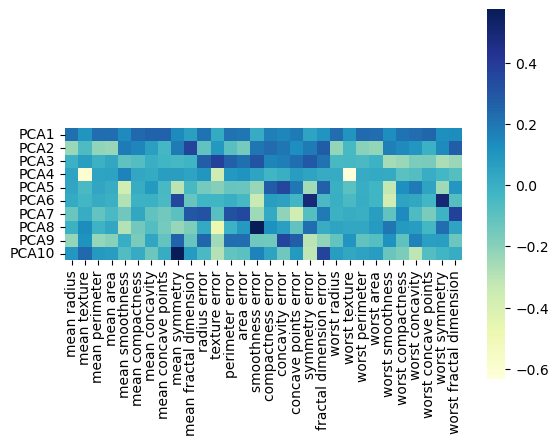

In [107]:
# Plot a heat map showing the correlation between variables and the PCs
ax = sns.heatmap(pca.components_,
                 cmap='YlGnBu',
                 yticklabels=[ "PCA"+str(x) for x in range(1,pca.n_components_+1)],
                 xticklabels=list(features.columns),
                 cbar_kws={"orientation": "vertical"})
ax.set_aspect("equal")

You can see there's very little overlap between the features influencing each of the top PCs. This is because of the orthogonality requirement of the PCs - if they had the same features, they would be highly correlated and therefore little additional information.

### What could you use the dataframe of PCs for?

The saved dataframe containing the principal components can be used in several ways. We have demonstrated the first - it can be used to visualise the data.

In addition, supervised machine learning algorithms can be applied to the dataframe in order to train a model to predict whether a tumor is malignent. By applying models to the PCs rather than the original dataset, the number of features and, therefore, the complexity is vastly reduced. This provided faster and more efficient results.

The drawbacks of this are that some information is lost. Although PCA ensures this is minimised for a given number of PCs. It is also difficult to interpret the underlying relationships deriving the results as the PCs linearly combine many features (Brunton and Kutz, 2022).

## Task 2 - Neural network

In this task we will run one epoch (a forward and backward pass) of a simple neural network.

### The forward pass

The first step is to represent the neural network in python objects. Here I opt to use lists, utilising their indexing. One alternative would be to use dictionaries to avoid the need to use placeholders for the 0th element, however, this requires slightly more code.

Here we also define the learning rate which will later determine the how responsive the model weights are to the error. A high learning rate can lead to unstable training processes, whereas a low learning rate can get stuck in local optima rather than global optima, and they take a long time. The learning rate is a hyperparameter - it controls the learning process. In practice, a researcher can use cross-validation to explore the best value of learning rate depending on the evaluation objective (Smith, 2018).

In [108]:
# Create lists of variables (with place holders in 0th elements so the indexes match subscripts)
i = [-999, 0.2, 0.4]
w = [-999, 0.2, 0.4, 0.1, 0.3, 0.8, 0.6, 0.5, 0.7]
b = [-999, 0.35, 0.45]
t = [-999, 0.02, 0.85]

# Define the learning rate
lr = 0.5

The first step takes each input node, which can be thought of as two feature values of an individual observation, and calculates the input to the hidden layer by multiplying by a weight, adding a bias and summing the results.

\begin{equation}
    H_{input} = (i_x \times w_x + b_x) + (i_y \times w_y + b_y)
\end{equation}

The purpose of the weights is capture the 'importance' of a given input to that node. The bias sets a hurdle rate at which the activation function will or won't trigger. Alternatively, we can consider the weight to impact the steepness of the activation function and the bias to represent the point at which the activation function crosses the y-axis (Hastie et al., 2009). 

In [109]:
# Calculate the hidden layer input
h1_in = i[1]*w[1] + b[1] + i[2]*w[3] 


h2_in = i[2]*w[4] + b[1] + i[1]*w[2]
print(f'h1 input is: {h1_in} \nh2 input is: {h2_in}')

h1 input is: 0.43000000000000005 
h2 input is: 0.55


An activation function is then applied to the inputs. The objective of the activation function is to introduce (allow for) non-linearities, this ensures the network is able to approximate all potential functions creating a Universal Function Approximator (Sharma et al., 2020). The activation function is a choice of the researcher. In practice they may experiment with different types of activation function to understand the models performance. 

Here we use the simple sigmoid function:

\begin{equation*}
    O = \sigma(i) = \frac{1}{1+e^{-i}}
\end{equation*}

where $i$ is the input value.

In [110]:
# Define the sigmoid function
def sigmoid(input):
    output = 1/(1+ math.exp(-input))
    return output

In [111]:
# Apply the  activation function to hidden layer inputs
h1_out = sigmoid(h1_in)
h2_out = sigmoid(h2_in)
print(f'The output of h1 is: {h1_out}\nThe output of h2 is: {h2_out}')

The output of h1 is: 0.6058736684317606
The output of h2 is: 0.6341355910108007


The input to the final layer is then calculated using the same method as in equation $(1)$ above with the output from the hidden layer as the input.

In [112]:
# Calculate the input to the output layers
o1_in = h1_out * w[5] + b[2] + h2_out * w[6] 
o2_in = h1_out * w[7] + h2_out * w[8] + b[2]
print(f'The input of o1 is: {o1_in}\nThe input of o2 is: {o2_in}')

The input of o1 is: 1.315180289351889
The input of o2 is: 1.1968317479234407


Again, the activation function is applied to the input of the final layyer nodes.

In [113]:
# Apply the sgmoid activation function to output layer inputs to get predictions
o1_out = sigmoid(o1_in)
o2_out = sigmoid(o2_in)
print(f'The output of o1 is: {o1_out}\nThe output of o2 is: {o2_out}')

The output of o1 is: 0.7883787146358164
The output of o2 is: 0.7679606896346601


We have now calculated the first forward pass. We see that both potential outputs have similar values of 0.79 for output 1 and 0.77 for output 2. The next step is to use the true values to adjust the models' weights and get the predictions closer to the true outputs.

### Backpropagation

The next step is to calculate the error function for the algorithm to minimise. Here we use the sum of squared error, this punishes predictions that are further from the true value polynomially. Again this is a choice for the researcher. There are many alternatives, a popular option being the mean absolute error which punishes large errors proportionally.

The error for the single data point is shown below. In practice, this would then be averaged over the entire training dataset.

\begin{equation*}
    E_n = \sum_{n=1}^{n} \frac{1}{2} (T_n - O_n)^2
\end{equation*}

In [114]:
# Calculate the sum of squared total error from target
E_1 = 1/2 * (t[1] - o1_out)**2
E_2 = 1/2 * (t[2] - o2_out)**2
E = E_1 + E_2
print(f'The total error from first pass is: {E}')

The total error from first pass is: 0.29856814877530496


We use the chain rule to calculate how the loss function varies with each weight in the hidden layer. Here I show the example of $w_5$.

\begin{equation*}
    \frac{\partial E_n}{\partial w_5} = \frac{\partial E_n}{\partial O_{1_{out}}} \cdot \frac{\partial O_{1_{out}}}{\partial O_{1_{in}}} \cdot \frac{\partial O_{1_{in}}}{\partial w_5}
\end{equation*}

where

\begin{equation*}
     \frac{\partial E_n}{\partial O_{1_{out}}} = 2 \times \frac{1}{2} (T_1 - O_{1_{out}}) \times -1 = O_{1_{out}} - T_1
\end{equation*}

\begin{equation*}
     \frac{\partial O_{1_{out}}}{\partial O_{1_{in}}} = \sigma(O_{1_{out}})(1 - \sigma(O_{1_{out}}))
\end{equation*}

\begin{equation*}
     \frac{\partial O_{1_{in}}}{\partial w_5} = h_{1_{out}}
\end{equation*}

and $\sigma$ is the sigmoid function.

Intuitively, here we want to understand how the error will change as the weight changes. By calculating the derivative we understand the gradient (scale and direction) of the error function for each weight - how much each weight contributes to the error.

In [115]:
# Derivative of error wrt w5
E_w5 = (o1_out - t[1]) * ((o1_out) * (1 - (o1_out))) * h1_out
E_w5

# Derivative of error wrt w6 
E_w6 = (o1_out - t[1]) * ((o1_out) * (1 - (o1_out))) * h2_out
E_w6

# Derivative of error wrt w7
E_w7 = (o2_out - t[2]) * ((o2_out) * (1 - (o2_out))) * h1_out

# Derivative of error wrt w8
E_w8 = (o2_out - t[2]) * ((o2_out) * (1 - (o2_out))) * h2_out

We can then use the information of each weights derivative to update weights value. i.e. should it increase or decrease and at what scale. 

Here is where we use the learning rate determined earlier. It is multiplied by the derivative before updating the weight. We can see that a higher learning rate will take more confidence in the recent gradient calculation moving further on the error function.

\begin{equation*}
    w_{x_{new}} = w_x - LR \times \frac{\partial E_n}{\partial w_x} 
\end{equation*}

where LR is the learning rate.

In [116]:
# Update hidden layer weights
w5_new = w[5] - lr * E_w5
w6_new = w[6] - lr * E_w6
w7_new = w[7] - lr * E_w7
w8_new = w[8] - lr * E_w8

The next step is to update the weights of the first layer, again using the chain rule. As the weights in the first layer (and in larger networks, any but the penultimate layer) are determined by both outputs, we must calculate how $E_1$ and $E_2$ each change with each weight.

\begin{equation*}
    \frac{\partial E_1}{\partial w_1} = \frac{\partial E_n}{\partial O_{1_{out}}} \cdot \frac{\partial O_{1_{out}}}{\partial O_{1_{in}}} \cdot \frac{\partial O_{1_{in}}}{\partial h_{1_{out}}} \cdot \frac{\partial h_{1_{out}}}{\partial h_{1_{in}}} \cdot \frac{\partial h_{1_{in}}}{\partial w_1}
\end{equation*}

where

\begin{equation*}
     \frac{\partial E_1}{\partial O_{1_{out}}} = 2 \times \frac{1}{2} (T_1 - O_{1_{out}}) \times -1 = O_{1_{out}} - T_1
\end{equation*}

\begin{equation*}
     \frac{\partial O_{1_{out}}}{\partial O_{1_{in}}} = \sigma(O_{1_{out}})(1 - \sigma(O_{1_{out}}))
\end{equation*}

\begin{equation*}
     \frac{\partial O_{1_{in}}}{\partial h_{1_{out}}} = w_8
\end{equation*}

\begin{equation*}
    \frac{\partial h_{1_{out}}}{\partial h_{1_{in}}}  = \sigma(h_{1_{out}})(1 - \sigma(h_{1_{out}}))
\end{equation*}

\begin{equation*}
    \frac{\partial h_{1_{in}}}{\partial w_1}  = i_1
\end{equation*}

The calculation must then be repeated for $O_2$ and the results multiplied

\begin{equation*}
    \frac{\partial E_n}{\partial w_1} = \frac{\partial E_1}{\partial w_1} \cdot \frac{\partial E_2}{\partial w_1} 
\end{equation*}

In [117]:
# Derivative of error wrt w1 
E_w1 = ((o1_out - t[1]) * ((o1_out) * (1 - (o1_out))) * w[5] * ((h1_out) * (1 - (h1_out))) * i[1]) + ((o2_out - t[2]) * ((o2_out) * (1 - (o2_out))) * w[7] * ((h1_out) * (1 - (h1_out))) * i[1])

# Derivative of error wrt w2
E_w2 = ((o1_out - t[1]) * ((o1_out) * (1 - (o1_out))) * w[6] * ((h2_out) * (1 - (h2_out))) * i[1]) + ((o2_out - t[2]) * ((o2_out) * (1 - (o2_out))) * w[8] * ((h2_out) * (1 - (h2_out))) * i[1])

# Derivative of error wrt w3
E_w3 = ((o1_out - t[1]) * ((o1_out) * (1 - (o1_out))) * w[5] * ((h1_out) * (1 - (h1_out))) * i[2]) + ((o2_out - t[2]) * ((o2_out) * (1 - (o2_out))) * w[7] * ((h1_out) * (1 - (h1_out))) * i[2])

# Derivative of error wrt w4
E_w4 = ((o1_out - t[1]) * ((o1_out) * (1 - (o1_out))) * w[6] * ((h2_out) * (1 - (h2_out))) * i[2]) + ((o2_out - t[2]) * ((o2_out) * (1 - (o2_out))) * w[8] * ((h2_out) * (1 - (h2_out))) * i[2])

Again we use the calculated gradients to update the weights based on the learning rate.

In [118]:
# Update layer weights
w1_new = w[1] - lr * E_w1
w2_new = w[2] - lr * E_w2
w3_new = w[3] - lr * E_w3
w4_new = w[4] - lr * E_w4

# Store all new weights in a list
w_new = [-999, w1_new, w2_new, w3_new, w4_new, w5_new, w6_new, w7_new, w8_new]
print('The updated weights in order of subscripts are:')
w_new[1:]

The updated weights in order of subscripts are:


[0.19772561208004197,
 0.3984528961231634,
 0.09545122416008389,
 0.2969057922463268,
 0.7611651487081146,
 0.5593536364774861,
 0.5044286834532077,
 0.7046352663027406]

We have now completed one forward and back pass. 

As an additional final step, I calculate a further forward pass to see if the outputs are closer to the true values.

In [119]:
# Run one more forward pass to see updated predictions
h1_in = i[1]*w_new[1] + b[1] + i[2]*w_new[3] 
h1_in

h2_in = i[2]*w_new[4] + b[1] + i[1]*w_new[2]
h2_in

h1_out = sigmoid(h1_in)
h2_out = sigmoid(h2_in)

o1_in = h1_out * w_new[5] + b[2] + h2_out * w_new[6] 
o2_in = h1_out * w_new[7] + h2_out * w_new[8] + b[2]

o1_out_new = sigmoid(o1_in)
o2_out_new = sigmoid(o2_in)
print(f'Original prediction: {o1_out}; Updated prediction: {o1_out_new}; Target: {t[1]}')
print(f'Original prediction: {o2_out}; Updated prediction: {o2_out_new}; Target: {t[2]}')

# Calcualte an updated error
E_new = 1/2 * (t[1] - o1_out_new)**2 + 1/2 * (t[2] - o2_out_new)**2
print(f'The error has been reduced by {np.round((E-E_new)/E, 4)}%')

Original prediction: 0.7883787146358164; Updated prediction: 0.779930543915905; Target: 0.02
Original prediction: 0.7679606896346601; Updated prediction: 0.7688674728892834; Target: 0.85
The error has been reduced by 0.0219%


We see that the predictions have marginally improved. In practice this process would be repeated several times to fit the model. 

### Give a short explanation of the steps you would take train and test a simple neural network like the one above in practice in Python

As with most data science projects it is helpful to follow the data science pipeline.

- Data acquisition
- Data cleaning
- Data exploration
- Data modelling
- Data visualisation

Going through each in context. Neural networks are a supervised technique that work for both regression and classification problems. Therefore a (partially) labeled dataset is required.

In the cleaning stage, it is often good to standardise and normalise the data to avoid over-influence from variables of larger scale.

The data should then be split into training and testing sets to judge the model's out-of-sample performance, imitating its performance in practice. Cross validation should also be performed on the training data to explore performance under different values of hyperparameters. In the case of the neural network, these could include the choice of activation function, the number of hidden layers and the learning rate, amongst many more (Kadhim et al., 2022).  The choice of evaluation metric and hyperparameters will also be important depending on the objective of the model.

The sklearn package can be used to fit the neural network and then predict based on the optimised model giving a final performance metric.

As with all supervised machine learning models the choice of perfomance metric should reflect the real world costs and benefits of over and under prediction/identification.

## Task 3 - Digit classification

In this task we will apply several supervised learning classification algorithms to predict the digits represented in hand-written numbers stored as images.

### Import data

We first import the data.

In [120]:
# Load the digits dataset
digits = load_digits()

As with task 1 the data is stored in a dictionary - we select the 'data' and 'target' keys to form our dataframe.

### Clean and explore data

In [121]:
# Combine data and target into a single pandas dataframe
digits_df = pd.DataFrame(np.c_[digits['data'], digits['target']],
                  columns= np.append(digits['feature_names'], ['target']))
digits_df

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0,9.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0,8.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0,9.0


In [122]:
digits_df.shape

(1797, 65)

The data has 1797 rows and 65 columns, one of which is the target column giving 64 features.

In [123]:
# Create table of summary statistics.
digits_df.describe().T

,count,mean,std,min,25%,50%,75%,max
pixel_0_0,1797.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
pixel_0_1,1797.0,0.303840,0.907192,0.0,0.0,0.0,0.0,8.0
pixel_0_2,1797.0,5.204786,4.754826,0.0,1.0,4.0,9.0,16.0
pixel_0_3,1797.0,11.835838,4.248842,0.0,10.0,13.0,15.0,16.0
pixel_0_4,1797.0,11.848080,4.287388,0.0,10.0,13.0,15.0,16.0
...,...,...,...,...,...,...,...,...
pixel_7_4,1797.0,11.809126,4.933947,0.0,10.0,14.0,16.0,16.0
pixel_7_5,1797.0,6.764051,5.900623,0.0,0.0,6.0,12.0,16.0
pixel_7_6,1797.0,2.067891,4.090548,0.0,0.0,0.0,2.0,16.0
pixel_7_7,1797.0,0.364496,1.860122,0.0,0.0,0.0,0.0,16.0


Each pixel takes a value between 0 and 16, indicating the degree of illumination. The target takes a number between 0 and 9 indicating the possible digits.

Below we plot a histogram to understand the frequency of each digit in the dataset.

(array([178., 182., 177., 183., 181., 182., 181., 179., 174., 180.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

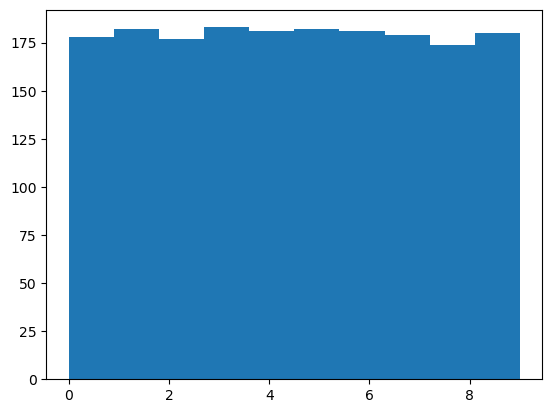

In [124]:
# Plot a histogram of the target
plt.hist(digits_df['target'])

We can see that there is a fairly uniform number of each digit so there is no need to worry about over or under-sampling.

## Analysis

In [125]:
# Split into training and testing data
features = digits_df.drop(['target'], axis=1)
target = digits_df['target']

X_train, X_test, y_train, y_test = train_test_split(features, target, train_size=0.8, random_state=0)

### Model evaluation

One key decision is how to measure the performance of the models. As we saw earlier, the dataset has a fairly uniform distribution of target outputs. It is therefore reasonable to use a standard accuracy measure.

\begin{equation*}
    Accuracy = \frac{Correct\: predictions}{Total\: predictions
}
\end{equation*}

However, to ensure rigor of the results, I also present an F1 score measure - in particular the 'macro' average. The F1 score combines the precision and recall. Precision measures the proportion of positive predictions that are truly positive for each class; recall is the proportion of negative predictions that are truly negative for each class. The F1
score takes the mean between the two giving equal weight to each class (James et al., 2014).

\begin{equation*}
    F1\:Score = 2 \cdot \frac{precision \cdot recall}{precision+recall} 
\end{equation*}

I now create 2 functions to aid with the visualisation of results.

In [126]:
# Confusion matrix
def plot_confusion_matrix(y_true, y_pred, title):
    '''Function to plot a confusion matrix with title

    param: y_true: True values of Y
    param: y_pred: Predicted values of Y
    param: title: Title of plot. Can be set to the name of the model.
    '''

    # Plot the confusion matrix
    cf = confusion_matrix(y_test, y_pred)
    cm_display = ConfusionMatrixDisplay(cf)
    cm_display.plot()
    plt.title(title)
    plt.show()

In [127]:
def model_output(model, X_test: pd.DataFrame, y_test: pd.Series) -> pd.DataFrame :
    '''
    Function to produce accuracy, F1 score and confusion matrix given a trained sklearn model along with test X and y values.

    model: trained sklearn model object
    X_test: Attributes of test observations
    y_test: Outcomes of test observations

    return: Table of model results
    '''

    # Calculate predictions using test data
    y_pred = model.predict(X_test)
    y_probs = model.predict_proba(X_test)[:, 1] # proabilities y == 1

    # Calculate and print accuracy scores
    accuracy = model.score(X_test, y_test) * 100
    f1 = f1_score(y_test, y_pred, average =  'macro')
    
    results = pd.DataFrame({'Model': [model.__class__.__name__], 
                'Accuracy': [accuracy],
                'F1 Score': [f1]})
    
    print(results)

    # Plot confusion matricies and precision-recall curves
    print(classification_report(y_test, y_pred))
    plot_confusion_matrix(y_test, y_pred, title=model.__class__.__name__)

    return results

Then I define the models to explore. I use 3 different classifier models: a multi-layer perceptron (neural network) classifier, a k-nearest neighbour classifier (KNN) and a random forest classifier.

All models have a set of hyperparameters that will be tuned using cross-validation.


Optimal hyperparameter selection:


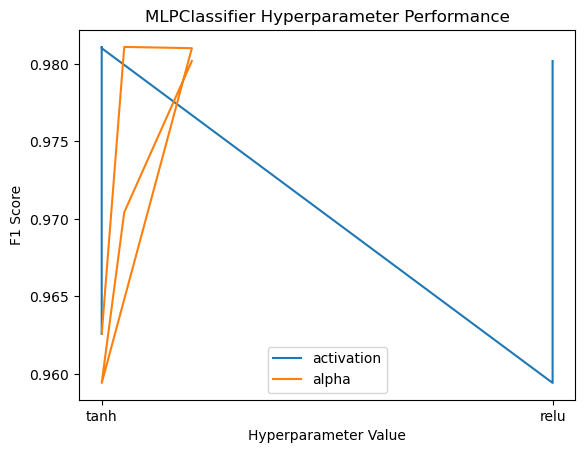

MLPClassifier best parameters: {'activation': 'tanh', 'alpha': 0.05}
MLPClassifier best F1 score in validation: 0.9810906888321096

Model performance using optimal hyperparameters on test data:

           Model   Accuracy  F1 Score
0  MLPClassifier  98.333333   0.98442
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        27
         1.0       0.94      0.97      0.96        35
         2.0       0.97      1.00      0.99        36
         3.0       1.00      1.00      1.00        29
         4.0       1.00      1.00      1.00        30
         5.0       0.97      0.97      0.97        40
         6.0       1.00      0.98      0.99        44
         7.0       1.00      1.00      1.00        39
         8.0       0.97      0.95      0.96        39
         9.0       0.98      0.98      0.98        41

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98  

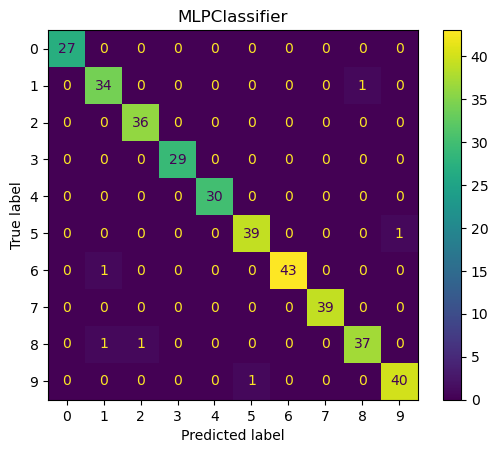


Optimal hyperparameter selection:


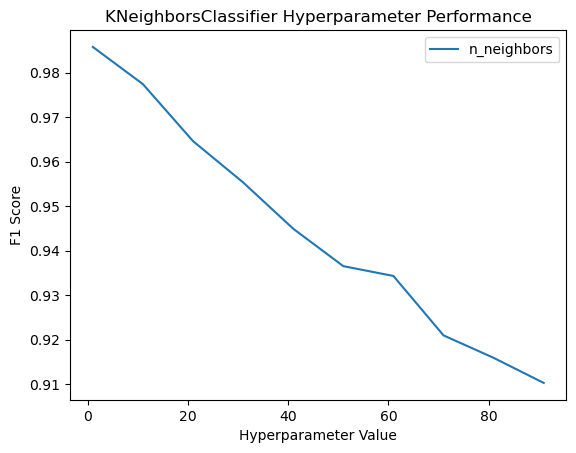

KNeighborsClassifier best parameters: {'n_neighbors': 1}
KNeighborsClassifier best F1 score in validation: 0.9858102367514985

Model performance using optimal hyperparameters on test data:

                  Model   Accuracy  F1 Score
0  KNeighborsClassifier  98.888889  0.989055
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        27
         1.0       1.00      1.00      1.00        35
         2.0       1.00      0.97      0.99        36
         3.0       0.94      1.00      0.97        29
         4.0       1.00      1.00      1.00        30
         5.0       0.97      0.97      0.97        40
         6.0       1.00      1.00      1.00        44
         7.0       1.00      1.00      1.00        39
         8.0       1.00      1.00      1.00        39
         9.0       0.97      0.95      0.96        41

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg    

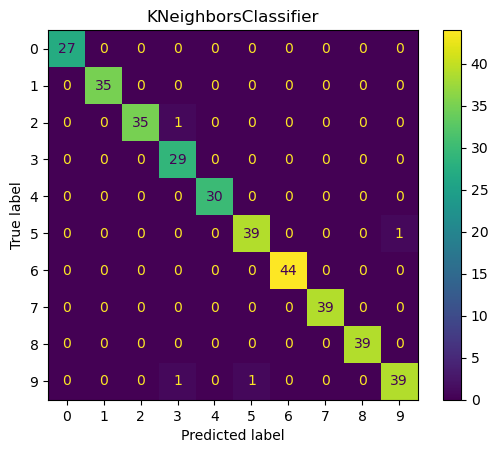


Optimal hyperparameter selection:


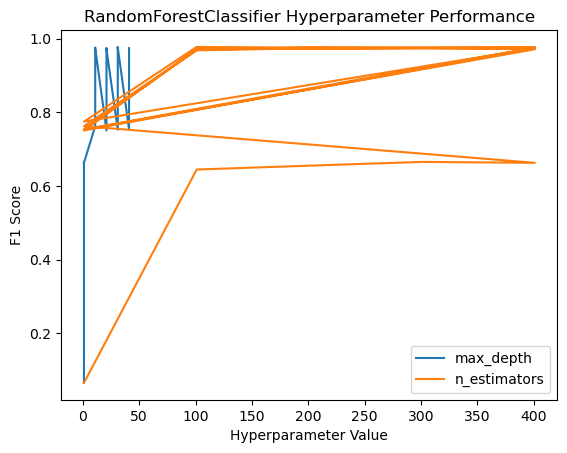

RandomForestClassifier best parameters: {'max_depth': None, 'n_estimators': 101}
RandomForestClassifier best F1 score in validation: 0.9775261831207656

Model performance using optimal hyperparameters on test data:

                    Model   Accuracy  F1 Score
0  RandomForestClassifier  96.944444  0.969452
              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98        27
         1.0       0.92      1.00      0.96        35
         2.0       1.00      0.94      0.97        36
         3.0       0.91      1.00      0.95        29
         4.0       1.00      0.97      0.98        30
         5.0       0.97      0.95      0.96        40
         6.0       1.00      0.98      0.99        44
         7.0       0.95      1.00      0.97        39
         8.0       1.00      0.92      0.96        39
         9.0       0.97      0.95      0.96        41

    accuracy                           0.97       360
   macro avg       0.97      0.97      0

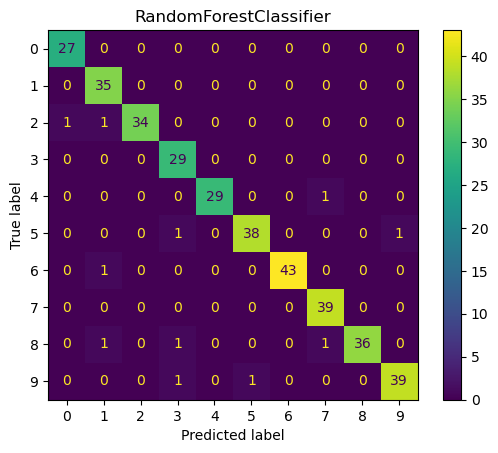

{MLPClassifier(max_iter=1000, random_state=1, solver='lbfgs'): 0.9844202312999212, KNeighborsClassifier(): 0.9890545122587376, RandomForestClassifier(): 0.9694515408969666}


,Model,Accuracy,F1 Score
0,MLPClassifier,98.333333,0.984420
1,KNeighborsClassifier,98.888889,0.989055
2,RandomForestClassifier,96.944444,0.969452


In [128]:
# Define a list of models and their corresponding parameter grids
models = [
    (MLPClassifier(solver='lbfgs', random_state=1, max_iter=1000), {'alpha': [0.0001, 0.05, 0.2], 'activation': ['tanh', 'relu']}), # use softmax
    (KNeighborsClassifier(), {'n_neighbors': np.arange(1, 100, 10)}), 
    (RandomForestClassifier(), {'max_depth': np.append(np.arange(1, 50, 10), None), 'n_estimators': np.arange(1, 500, 100)})
    
]

# Define a custom F1 scorer
f1_scorer = make_scorer(f1_score, pos_label = 1, average = 'macro') 

# Create empty dict to store test scores
test_score = {}

# Create empty dataframe to store results in
results_df_tuned = pd.DataFrame()

# Loop through the models and conduct the grid search with 5-fold cross-validation for each
for model, param_grid in models:

    # Use gird search to measure model performance with each parameter value
    grid = GridSearchCV(model, param_grid, cv=5, scoring=f1_scorer, error_score='raise')

    # Fit the model with all sets of parameters using oversampled training data
    grid.fit(X_train, y_train) 

    print('\nOptimal hyperparameter selection:')

    # Plot the results of the grid search
    plt.title(f"{model.__class__.__name__} Hyperparameter Performance")
    plt.xlabel("Hyperparameter Value")
    plt.ylabel("F1 Score")
    for param_name in grid.cv_results_['params'][0].keys():
        plt.plot(grid.cv_results_['param_' + param_name], 
                 grid.cv_results_['mean_test_score'], 
                 label=param_name) # mean_test_score refers to the CV tests
    plt.legend()
    plt.show()

    # Print parameters that give the best results along with the score
    print(f"{model.__class__.__name__} best parameters: {grid.best_params_}")
    print(f"{model.__class__.__name__} best F1 score in validation: {grid.best_score_}")

    best_model = grid.best_estimator_

    print('\nModel performance using optimal hyperparameters on test data:\n')
  
    # Evaluate the model on the test set and add to the dictionary
    test_score[model] = f1_score(y_test, 
                                 best_model.predict(X_test),
                                 pos_label = 1,
                                 average = 'macro')
    
    output = model_output(best_model, X_test, y_test)
    results_df_tuned = pd.concat([results_df_tuned, output], ignore_index = True)

print(test_score)
results_df_tuned

KNN has the highest score on both accuracy and F1 score measures, although all models perform reasonably well.

### Conclusion

To conclude we have taken the dataset of handwritten digits, explored the data to check if any cleaning was neccessary, and then applied three supervised machine learning models to train a model to identify each digit. In order to train the model we used a train-test split along with cross validation in order to tune the hyperparameters. We finally evaluated each model's performance using two evaluation metrics well suited to the problem. We found that one model, the K-nearest neighbour model, performed best across both metrics, although all models performed reasonably well.

# References

Brunton, S. L. and Kutz, J. N. (2022) Data-driven science and engineering: Machine learning, dynamical systems, and control. Cambridge University Press

Hastie, T., Tibshirani, R., & Friedman, J. H. (2009). The elements of statistical learning: data mining, inference, and prediction. 2nd ed. New York, Springer.

James, G., Witten, D., Hastie, T., & Tibshirani, R. (2014). An Introduction to Statistical Learning: with
Applications in R. Springer Publishing Company, Incorporated.

Kadhim, Z. S., Abdullah, H. S., & Ghathwan, K. I. (2022). Artificial Neural Network Hyperparameters Optimization: A Survey. International Journal of Online and Biomedical Engineering (iJOE), 18(15), pp. 59–87.

Pedregosa et al., (2011) Scikit-learn: Machine Learning in Python, JMLR 12, pp. 2825-2830

Sanguansat, P. (2012). Principal Component Analysis (P. Sanguansat, Ed.). IntechOpen.

Sharma, Siddharth & Sharma, Simone & Athaiya, Anidhya. (2020). ACTIVATION FUNCTIONS IN NEURAL NETWORKS. International Journal of Engineering Applied Sciences and Technology

Shlens, J. (2003) A TUTORIAL ON PRINCIPAL COMPONENT ANALYSIS Derivation, Discussion and Singular
Value Decomposition

Smith, L.N., (2018) A disciplined approach to neural network hyper-parameters: Part 1--learning rate, batch size, momentum, and weight decay. arXiv preprint arXiv:1803.09820.